In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df2018 = pd.read_csv('normalization_zscore_2005_2018_result.csv')
df2019 = pd.read_csv('normalization_zscore_2019_only_result.csv')
# 이상치 제거 df = df[df['123'].between(-2,2)]

In [3]:
df = pd.concat([df2018, df2019])

In [4]:
df['상태'].value_counts()
# 3: 가입, 1: 해약, 4: 만기, 2: 행사, 0: 만기_해약

3    194564
1    121534
2     11003
4     10785
0      6159
Name: 상태, dtype: int64

In [5]:
# 학습할 2005 ~ 2018년 데이터를 언더샘플링
df18_0 = df[df['상태']==0].sample(n=6000)
df18_1 = df[df['상태']==1].sample(n=6000)
df18_2 = df[df['상태']==2].sample(n=6000)
df18_3 = df[df['상태']==3].sample(n=6000)
df18_4 = df[df['상태']==4].sample(n=6000)

In [6]:
# 샘플링한 데이터 합침
df2018_1st = pd.concat([df18_0, df18_1, df18_2, df18_3, df18_4])
df2018_1st.head(5)

,이름번호,성별,나이,진행률,상품금액,잔여금액,연체횟수,가입기간,최종불입일자,상태
27254,류제상620529,0,0.183470,1.0,-1.233702,-2.875303,-0.718028,2.142098,16440 days 00:00:00.000000000,0
14350,최정자490228,1,1.090761,1.0,-1.233702,-2.875303,-0.718028,2.136932,16514 days 00:00:00.000000000,0
31957,제형근551213,0,0.672011,1.0,-1.233702,-2.875303,-0.718028,2.124535,17343 days 00:00:00.000000000,0
24994,김효경660904,1,-0.095696,1.0,-1.233702,-2.875303,-0.718028,2.134866,16463 days 00:00:00.000000000,0
30789,박경화751210,1,-0.723820,1.0,-1.233702,-2.875303,-0.718028,2.126601,16476 days 00:00:00.000000000,0


In [7]:
df2018_1st.shape

(30000, 10)

In [8]:
df2018_1st['상태'].value_counts()

4    6000
3    6000
2    6000
1    6000
0    6000
Name: 상태, dtype: int64

In [23]:
df2018_1st.to_csv('./randomForest/under_sampling_6000_1st.csv')
df2018_2nd.to_csv('./randomForest/under_sampling_6000_2nd.csv')
df2018_3rd.to_csv('./randomForest/under_sampling_6000_3rd.csv')
df2018_4th.to_csv('./randomForest/under_sampling_6000_4th.csv')
df2018_5th.to_csv('./randomForest/under_sampling_6000_5th.csv')
df2018_6th.to_csv('./randomForest/under_sampling_6000_6th.csv')
df2018_7th.to_csv('./randomForest/under_sampling_6000_7th.csv')
df2018_8th.to_csv('./randomForest/under_sampling_6000_8th.csv')
df2018_9th.to_csv('./randomForest/under_sampling_6000_9th.csv')
df2018_10th.to_csv('./randomForest/under_sampling_6000_10th.csv')

In [9]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.metrics import f1_score 

# accuracy, precision, recall, f1 스코어를 구하기 위한 함수
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred,average='macro')
    recall = recall_score(y_test , pred, average='macro')
    # F1 스코어 추가
    f1 = f1_score(y_test,pred, average='macro')
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = df2018_1st[['성별', '나이', '진행률', '상품금액', '잔여금액', '연체횟수', '가입기간']]
rf.data = rf.values.tolist()
rf.target = df2018_1st[['상태']]

rf.feature_names=['sex','age','process_rate','price','remaining_price','overdue_num','period']
rf.target_names=['contract','cancellation']
rf.head(3)

# 테스트데이터와 학습데이터를 2:8 비율로 나눠서 학습 진행
X_train , X_test , y_train , y_test = train_test_split(rf.data, rf.target, test_size=0.2,  random_state=32)

rnd_clf = RandomForestClassifier(n_estimators=250, max_depth=9 , n_jobs=-1, random_state=32)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

accuracy = accuracy_score(y_test , y_pred_rf)
print('# 1번째 랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

get_clf_eval(y_test, y_pred_rf)

D:\Project\Django\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
D:\Project\Django\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
D:\Project\Django\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys
D:\Project\Django\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
D:\Project\Django\lib\site-packages\ipyker

# 1번째 랜덤 포레스트 정확도: 0.9428
오차 행렬
[[1189    0    2    0    0]
 [   0 1198    0   40    0]
 [  18    0  992    1  167]
 [   9   40    0 1096    0]
 [   0    0   66    0 1182]]
정확도: 0.9428, 정밀도: 0.9443, 재현율: 0.9425, F1:0.9426


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


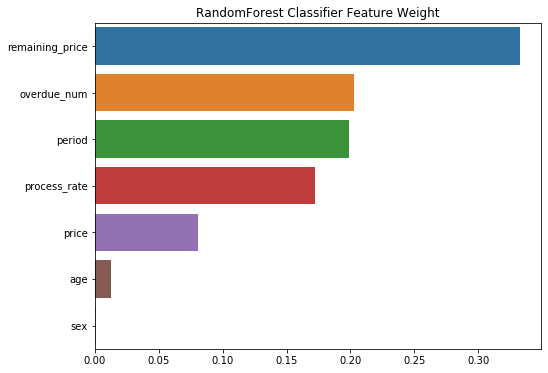

In [12]:
import seaborn as sns
ftr_importances_values = rnd_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=rf.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:8]

plt.figure(figsize=(8,6))
plt.title('RandomForest Classifier Feature Weight')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

sex : 0.001
age : 0.013
process_rate : 0.172
price : 0.081
remaining_price : 0.333
overdue_num : 0.203
period : 0.199


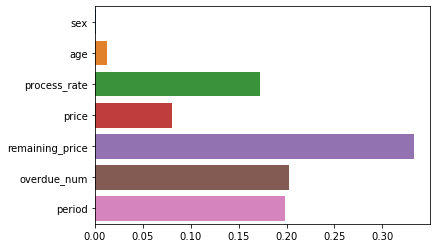

In [14]:
for name, value in zip(rf.feature_names , rnd_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=ftr_importances_values , y=rf.feature_names)